## Getting the required packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing PACKAGES:

# data analysis
import numpy as np
import pandas as pd

#ML model training
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima.model import ARIMA
import itertools


#evaluation metric
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, \
median_absolute_error, mean_squared_log_error
from sklearn.model_selection import train_test_split

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Getting the dataset

In [3]:
complete_data = pd.read_excel('data.csv', header=[0,1])
complete_data.head()

S.No            From Date              To Date Alandi, Pune - IITM  \
  S.No            From Date              To Date        PM2.5(ug/m3)   
0    1  04-Aug-2015 - 00:00  05-Aug-2015 - 00:00                 NaN   
1    2  05-Aug-2015 - 00:00  06-Aug-2015 - 00:00                 NaN   
2    3  06-Aug-2015 - 00:00  07-Aug-2015 - 00:00                 NaN   
3    4  07-Aug-2015 - 00:00  08-Aug-2015 - 00:00                 NaN   
4    5  08-Aug-2015 - 00:00  09-Aug-2015 - 00:00                 NaN   

                                                            \
  PM10(ug/m3) NO2(ug/m3) SO2(ug/m3) CO(mg/m3) Ozone(ug/m3)   
0         NaN        NaN        NaN       NaN          NaN   
1         NaN        NaN        NaN       NaN          NaN   
2         NaN        NaN        NaN       NaN          NaN   
3         NaN        NaN        NaN       NaN          NaN   
4         NaN        NaN        NaN       NaN          NaN   

  Bhosari, Pune - IITM  ... Savitribai Phule Pune University, Pune - MPCB  \
          PM2.5(ug/m3)  ...                                    NO2(ug/m3)   
0                  NaN  ...                                           NaN   
1                  NaN  ...                                           NaN   
2                  NaN  ...                                           NaN   
3                  NaN  ...                                           NaN   
4                  NaN  ...                                           NaN   

                                    Transport Nagar-Nigdi, Pune - IITM  \
  SO2(ug/m3) CO(mg/m3) Ozone(ug/m3)                       PM2.5(ug/m3)   
0        NaN       NaN          NaN                                NaN   
1        NaN       NaN          NaN                                NaN   
2        NaN       NaN          NaN                                NaN   
3        NaN       NaN          NaN                                NaN   
4        NaN       NaN          NaN                                NaN   

                                                            
  PM10(ug/m3) NO2(ug/m3) SO2(ug/m3) CO(mg/m3) Ozone(ug/m3)  
0         NaN        NaN        NaN       NaN          NaN  
1         NaN        NaN        NaN       NaN          NaN  
2         NaN        NaN        NaN       NaN          NaN  
3         NaN        NaN        NaN       NaN          NaN  
4         NaN        NaN        NaN       NaN          NaN  

[5 rows x 63 columns]

In [4]:
all_stations = complete_data.iloc[1931:]
all_stations.head()

S.No            From Date              To Date Alandi, Pune - IITM  \
      S.No            From Date              To Date        PM2.5(ug/m3)   
1931  1932  14-Nov-2020 - 00:00  15-Nov-2020 - 00:00                 NaN   
1932  1933  15-Nov-2020 - 00:00  16-Nov-2020 - 00:00                 NaN   
1933  1934  16-Nov-2020 - 00:00  17-Nov-2020 - 00:00                 NaN   
1934  1935  17-Nov-2020 - 00:00  18-Nov-2020 - 00:00                 NaN   
1935  1936  18-Nov-2020 - 00:00  19-Nov-2020 - 00:00                 NaN   

                                                               \
     PM10(ug/m3) NO2(ug/m3) SO2(ug/m3) CO(mg/m3) Ozone(ug/m3)   
1931         NaN        NaN        NaN       NaN          NaN   
1932         NaN        NaN        NaN       NaN          NaN   
1933         NaN        NaN        NaN       NaN          NaN   
1934         NaN        NaN        NaN       NaN          NaN   
1935         NaN        NaN        NaN       NaN          NaN   

     Bhosari, Pune - IITM  ... Savitribai Phule Pune University, Pune - MPCB  \
             PM2.5(ug/m3)  ...                                    NO2(ug/m3)   
1931                74.57  ...                                           NaN   
1932                93.36  ...                                           NaN   
1933                59.70  ...                                           NaN   
1934                  NaN  ...                                           NaN   
1935                  NaN  ...                                           NaN   

                                       Transport Nagar-Nigdi, Pune - IITM  \
     SO2(ug/m3) CO(mg/m3) Ozone(ug/m3)                       PM2.5(ug/m3)   
1931        NaN       NaN          NaN                              62.71   
1932        NaN       NaN          NaN                              57.17   
1933        NaN       NaN          NaN                              37.56   
1934        NaN       NaN          NaN                              36.32   
1935        NaN       NaN          NaN                              42.16   

                                                               
     PM10(ug/m3) NO2(ug/m3) SO2(ug/m3) CO(mg/m3) Ozone(ug/m3)  
1931       98.63      13.89        NaN      0.59        35.54  
1932       90.25      13.82        NaN      0.54        35.20  
1933       60.86      13.76        NaN      0.53        34.92  
1934       58.99      13.83        NaN      0.53        33.77  
1935       67.85      14.10        NaN      0.55        35.09  

[5 rows x 63 columns]

In [5]:
all_stations['Date'] = pd.to_datetime(all_stations['From Date']['From Date'], format='%d-%b-%Y - %H:%M')
all_stations.drop(columns=['From Date', 'To Date'], inplace=True)
all_stations.head()

S.No Alandi, Pune - IITM                                              \
      S.No        PM2.5(ug/m3) PM10(ug/m3) NO2(ug/m3) SO2(ug/m3) CO(mg/m3)   
1931  1932                 NaN         NaN        NaN        NaN       NaN   
1932  1933                 NaN         NaN        NaN        NaN       NaN   
1933  1934                 NaN         NaN        NaN        NaN       NaN   
1934  1935                 NaN         NaN        NaN        NaN       NaN   
1935  1936                 NaN         NaN        NaN        NaN       NaN   

                  Bhosari, Pune - IITM                         ...  \
     Ozone(ug/m3)         PM2.5(ug/m3) PM10(ug/m3) NO2(ug/m3)  ...   
1931          NaN                74.57      130.41      18.59  ...   
1932          NaN                93.36      164.01      18.20  ...   
1933          NaN                59.70      104.09      14.93  ...   
1934          NaN                  NaN         NaN        NaN  ...   
1935          NaN                  NaN         NaN        NaN  ...   

     Savitribai Phule Pune University, Pune - MPCB                         \
                                        SO2(ug/m3) CO(mg/m3) Ozone(ug/m3)   
1931                                           NaN       NaN          NaN   
1932                                           NaN       NaN          NaN   
1933                                           NaN       NaN          NaN   
1934                                           NaN       NaN          NaN   
1935                                           NaN       NaN          NaN   

     Transport Nagar-Nigdi, Pune - IITM                                    \
                           PM2.5(ug/m3) PM10(ug/m3) NO2(ug/m3) SO2(ug/m3)   
1931                              62.71       98.63      13.89        NaN   
1932                              57.17       90.25      13.82        NaN   
1933                              37.56       60.86      13.76        NaN   
1934                              36.32       58.99      13.83        NaN   
1935                              42.16       67.85      14.10        NaN   

                                  Date  
     CO(mg/m3) Ozone(ug/m3)             
1931      0.59        35.54 2020-11-14  
1932      0.54        35.20 2020-11-15  
1933      0.53        34.92 2020-11-16  
1934      0.53        33.77 2020-11-17  
1935      0.55        35.09 2020-11-18  

[5 rows x 62 columns]

## Data Preprocessing

In [6]:
def PM25(val):
    if val<=30:
        return round(val*(50/30), 2)
    elif val>30 and val<=60:
        return round(50 + (val-30)*(50/30), 2)
    elif val>60 and val<=90:
        return round(100 + (val-60)*(100/30), 2)
    elif val>90 and val<=120:
        return round(200 + (val-90)*(100/30), 2)
    elif val>120 and val<=250:
        return round(300 +(val-120)*(100/130), 2)
    elif val>250 and val<=380:
        return round(400 +(val-250)*(10/13), 2)  
    elif val>380:
        return 500

In [7]:
def PM10(val):
    if val<=100:
        return round(val, 2)
    elif val>100 and val<=250:
        return round(100 + (val-100)*(100/150), 2)
    elif val>250 and val<=350:
        return round(200 + (val-250), 2)
    elif val>350 and val<=430:
        return round(300 + (val-350)*(100/80), 2)
    elif val>430 and val<=510:
        return round(400 +(val-430)*(100/80), 2) 
    elif val>510:
        return 500

In [8]:
def NO2(val):
    if val<=40:
        return round(val*(50/40), 2)
    elif val>40 and val<=80:
        return round(50 + (val-40)*(50/40), 2)
    elif val>80 and val<=180:
        return round(100 + (val-80), 2)
    elif val>180 and val<=280:
        return round(200 + (val-180), 2)
    elif val>280 and val<=400:
        return round(300 + (val-280)*(100/120), 2)
    elif val>400 and val<=510:
        return round(400 +(val-400)*(100/120), 2)
    elif val>510:
        return 500

In [9]:
def SO2(val):
    if val<=40:
        return round(val*(50/40), 2)
    elif val>40 and val<=80:
        return round(50 + (val-40)*(50/40), 2)
    elif val>80 and val<=380:
        return round(100 + (val-80)*(100/300), 2)
    elif val>380 and val<=800:
        return round(200 + (val-380)*(100/420), 2)
    elif val>800 and val<=1600:
        return round(300 + (val-800)*(100/800), 2)
    elif val>1600 and val<=2400:
        return round(400 +(val-1600)*(100/800), 2)
    elif val>2400:
        return 500

In [10]:
def CO(val):
    if val<=1:
        return round(val*(50), 2)
    elif val>1 and val<=2:
        return round(50 + (val-1)*(50), 2)
    elif val>2 and val<=10:
        return round(100 + (val-2)*(50/4), 2)
    elif val>10 and val<=17:
        return round(200 + (val-10)*(100/7), 2)
    elif val>17 and val<=34:
        return round(300 + (val-17)*(100/17), 2)
    elif val>17 and val<=51:
        return round(400 +(val-34)*(100/17), 2)
    elif val>51:
        return 500

In [11]:
def O3(val):
    if val<=100:
        return round(val, 2)
    elif val>100 and val<=168:
        return round(100 + (val-100)*(100/68), 2)
    elif val>168 and val<=208:
        return round(200 + (val-168)*(100/40), 2)
    elif val>208 and val<=748:
        return round(300 + (val-208)*(100/540), 2)
    elif val>748 and val<=1288:
        return round(400 +(val-748)*(100/540), 2)
    elif val>1288:
        return 500

In [12]:
stations = all_stations.columns.get_level_values(0).unique().tolist()[1:-1]
stations

['Alandi, Pune - IITM',
 'Bhosari, Pune - IITM',
 'Hadapsar, Pune - IITM',
 'Karve Road, Pune - MPCB',
 'Katraj Dairy, Pune - MPCB',
 'MIT-Kothrud, Pune - IITM',
 'Mhada Colony, Pune - IITM',
 'Revenue Colony-Shivajinagar, Pune - IITM',
 'Savitribai Phule Pune University, Pune - MPCB',
 'Transport Nagar-Nigdi, Pune - IITM']

In [13]:
columns = pd.MultiIndex.from_tuples([], names=['Main', 'Sub'])
all_data = pd.DataFrame(columns=columns)

In [14]:
all_data['Date'] = all_stations['Date']
for station in stations:
    all_data[(station, 'PM2.5')] = all_stations[(station, 'PM2.5(ug/m3)')].apply(PM25)
    all_data[(station, 'PM10')] = all_stations[(station, 'PM10(ug/m3)')].apply(PM10)
    all_data[(station, 'NO2')] = all_stations[(station, 'NO2(ug/m3)')].apply(NO2)
    all_data[(station, 'SO2')] = all_stations[(station, 'SO2(ug/m3)')].apply(SO2)
    all_data[(station, 'CO')] = all_stations[(station, 'CO(mg/m3)')].apply(CO)
    all_data[(station, 'O3')] = all_stations[(station, 'Ozone(ug/m3)')].apply(O3)

all_data.head()

Main       Date Alandi, Pune - IITM                         \
Sub                           PM2.5 PM10 NO2   SO2  CO  O3   
1931 2020-11-14                 NaN  NaN NaN  None NaN NaN   
1932 2020-11-15                 NaN  NaN NaN  None NaN NaN   
1933 2020-11-16                 NaN  NaN NaN  None NaN NaN   
1934 2020-11-17                 NaN  NaN NaN  None NaN NaN   
1935 2020-11-18                 NaN  NaN NaN  None NaN NaN   

Main Bhosari, Pune - IITM                 ...  \
Sub                 PM2.5    PM10    NO2  ...   
1931               148.57  120.27  23.24  ...   
1932               211.20  142.67  22.75  ...   
1933                99.50  102.73  18.66  ...   
1934                  NaN     NaN    NaN  ...   
1935                  NaN     NaN    NaN  ...   

Main Savitribai Phule Pune University, Pune - MPCB              \
Sub                                            NO2 SO2  CO  O3   
1931                                           NaN NaN NaN NaN   
1932                                           NaN NaN NaN NaN   
1933                                           NaN NaN NaN NaN   
1934                                           NaN NaN NaN NaN   
1935                                           NaN NaN NaN NaN   

Main Transport Nagar-Nigdi, Pune - IITM                                   
Sub                               PM2.5   PM10    NO2   SO2    CO     O3  
1931                             109.03  98.63  17.36  None  29.5  35.54  
1932                              95.28  90.25  17.27  None  27.0  35.20  
1933                              62.60  60.86  17.20  None  26.5  34.92  
1934                              60.53  58.99  17.29  None  26.5  33.77  
1935                              70.27  67.85  17.62  None  27.5  35.09  

[5 rows x 61 columns]

## Getting to know the dataset

In [15]:
all_data.dtypes  # type is object bcoz that column is empty. deal later

Main                                Sub  
Date                                         datetime64[ns]
Alandi, Pune - IITM                 PM2.5           float64
                                    PM10            float64
                                    NO2             float64
                                    SO2              object
                                                  ...      
Transport Nagar-Nigdi, Pune - IITM  PM10            float64
                                    NO2             float64
                                    SO2              object
                                    CO              float64
                                    O3              float64
Length: 61, dtype: object

In [16]:
all_data.shape

(1029, 61)

In [17]:
all_data.isnull().sum()

Main                                Sub  
Date                                            0
Alandi, Pune - IITM                 PM2.5     518
                                    PM10      508
                                    NO2       605
                                    SO2      1029
                                             ... 
Transport Nagar-Nigdi, Pune - IITM  PM10      498
                                    NO2       488
                                    SO2      1029
                                    CO        479
                                    O3        467
Length: 61, dtype: int64

In [18]:
all_data.fillna(all_data.mean(), inplace=True)

In [19]:
all_data = all_data.loc[:, all_data.columns.get_level_values('Sub') != 'SO2']

In [20]:
all_data.isnull().sum()

Main                                           Sub  
Date                                                    0
Alandi, Pune - IITM                            PM2.5    0
                                               PM10     0
                                               NO2      0
                                               CO       0
                                               O3       0
Bhosari, Pune - IITM                           PM2.5    0
                                               PM10     0
                                               NO2      0
                                               CO       0
                                               O3       0
Hadapsar, Pune - IITM                          PM2.5    0
                                               PM10     0
                                               NO2      0
                                               CO       0
                                               O3       0
Karve Road, Pune - 

In [21]:
all_data = all_data.round(2)
all_data.head()

Main       Date Alandi, Pune - IITM                              \
Sub                           PM2.5   PM10    NO2     CO     O3   
1931 2020-11-14              108.95  85.68  27.86  61.65  18.75   
1932 2020-11-15              108.95  85.68  27.86  61.65  18.75   
1933 2020-11-16              108.95  85.68  27.86  61.65  18.75   
1934 2020-11-17              108.95  85.68  27.86  61.65  18.75   
1935 2020-11-18              108.95  85.68  27.86  61.65  18.75   

Main Bhosari, Pune - IITM                        ...  \
Sub                 PM2.5    PM10    NO2     CO  ...   
1931               148.57  120.27  23.24  68.31  ...   
1932               211.20  142.67  22.75  68.31  ...   
1933                99.50  102.73  18.66  68.31  ...   
1934                97.32   82.48  24.10  68.31  ...   
1935                97.32   82.48  24.10  68.31  ...   

Main Savitribai Phule Pune University, Pune - MPCB                       \
Sub                                          PM2.5   PM10    NO2     CO   
1931                                         36.64  41.16  13.43  12.38   
1932                                         36.64  41.16  13.43  12.38   
1933                                         36.64  41.16  13.43  12.38   
1934                                         36.64  41.16  13.43  12.38   
1935                                         36.64  41.16  13.43  12.38   

Main        Transport Nagar-Nigdi, Pune - IITM                             
Sub      O3                              PM2.5   PM10    NO2    CO     O3  
1931  20.54                             109.03  98.63  17.36  29.5  35.54  
1932  20.54                              95.28  90.25  17.27  27.0  35.20  
1933  20.54                              62.60  60.86  17.20  26.5  34.92  
1934  20.54                              60.53  58.99  17.29  26.5  33.77  
1935  20.54                              70.27  67.85  17.62  27.5  35.09  

[5 rows x 51 columns]

In [22]:
for station in stations: 
    all_data[(station, 'AQI')] = all_data[station].max(axis=1)
all_data.head()

Main       Date Alandi, Pune - IITM                              \
Sub                           PM2.5   PM10    NO2     CO     O3   
1931 2020-11-14              108.95  85.68  27.86  61.65  18.75   
1932 2020-11-15              108.95  85.68  27.86  61.65  18.75   
1933 2020-11-16              108.95  85.68  27.86  61.65  18.75   
1934 2020-11-17              108.95  85.68  27.86  61.65  18.75   
1935 2020-11-18              108.95  85.68  27.86  61.65  18.75   

Main Bhosari, Pune - IITM                        ... Alandi, Pune - IITM  \
Sub                 PM2.5    PM10    NO2     CO  ...                 AQI   
1931               148.57  120.27  23.24  68.31  ...              108.95   
1932               211.20  142.67  22.75  68.31  ...              108.95   
1933                99.50  102.73  18.66  68.31  ...              108.95   
1934                97.32   82.48  24.10  68.31  ...              108.95   
1935                97.32   82.48  24.10  68.31  ...              108.95   

Main Bhosari, Pune - IITM Hadapsar, Pune - IITM Karve Road, Pune - MPCB  \
Sub                   AQI                   AQI                     AQI   
1931               148.57                 91.95                   91.67   
1932               211.20                 91.95                   91.67   
1933               102.73                 91.95                   91.67   
1934                97.32                 91.95                   91.67   
1935                97.32                 91.95                   91.67   

Main Katraj Dairy, Pune - MPCB MIT-Kothrud, Pune - IITM  \
Sub                        AQI                      AQI   
1931                     44.83                    80.79   
1932                     44.83                    80.79   
1933                     44.83                    80.79   
1934                     44.83                    80.79   
1935                     44.83                    80.79   

Main Mhada Colony, Pune - IITM Revenue Colony-Shivajinagar, Pune - IITM  \
Sub                        AQI                                      AQI   
1931                     95.05                                   133.20   
1932                    317.38                                   300.61   
1933                     99.68                                   167.80   
1934                     69.95                                   115.10   
1935                     76.65                                   115.10   

Main Savitribai Phule Pune University, Pune - MPCB  \
Sub                                            AQI   
1931                                         41.16   
1932                                         41.16   
1933                                         41.16   
1934                                         41.16   
1935                                         41.16   

Main Transport Nagar-Nigdi, Pune - IITM  
Sub                                 AQI  
1931                             109.03  
1932                              95.28  
1933                              62.60  
1934                              60.53  
1935                              70.27  

[5 rows x 61 columns]

## Analysis on the complete data

In [23]:
top_pollutants_by_station = {}
for station in stations:
    level_columns = all_data[station]
    
    # Transpose the DataFrame to calculate the correlation matrix
    correlation_matrix = level_columns.corr()
    
    top_pollutants = correlation_matrix['AQI'].abs().nlargest(4).index[1:]
    top_pollutants_by_station[station] = list(top_pollutants)

In [24]:
print('Top 3 Pollutants with Highest Correlation to AQI:')
for station, top_pollutants in top_pollutants_by_station.items():
    print(f"{station} -")
    for i, pollutant in enumerate(top_pollutants):
        print(f"{i+1}. {pollutant}")
    print()

Top 3 Pollutants with Highest Correlation to AQI:
Alandi, Pune - IITM -
1. PM2.5
2. PM10
3. O3

Bhosari, Pune - IITM -
1. PM2.5
2. PM10
3. NO2

Hadapsar, Pune - IITM -
1. PM2.5
2. PM10
3. CO

Karve Road, Pune - MPCB -
1. NO2
2. PM2.5
3. PM10

Katraj Dairy, Pune - MPCB -
1. PM10
2. PM2.5
3. NO2

MIT-Kothrud, Pune - IITM -
1. PM2.5
2. PM10
3. NO2

Mhada Colony, Pune - IITM -
1. PM2.5
2. PM10
3. NO2

Revenue Colony-Shivajinagar, Pune - IITM -
1. NO2
2. PM2.5
3. PM10

Savitribai Phule Pune University, Pune - MPCB -
1. PM10
2. PM2.5
3. O3

Transport Nagar-Nigdi, Pune - IITM -
1. PM2.5
2. PM10
3. O3



In [25]:
AQI_data = pd.DataFrame()
AQI_data['Date'] = all_data['Date']
for station in stations:
    AQI_data[station] = all_data[(station, 'AQI')]
AQI_data.set_index('Date', inplace=True)
AQI_data.head()

,"Alandi, Pune - IITM","Bhosari, Pune - IITM","Hadapsar, Pune - IITM","Karve Road, Pune - MPCB","Katraj Dairy, Pune - MPCB","MIT-Kothrud, Pune - IITM","Mhada Colony, Pune - IITM","Revenue Colony-Shivajinagar, Pune - IITM","Savitribai Phule Pune University, Pune - MPCB","Transport Nagar-Nigdi, Pune - IITM"
Date,,,,,,,,,,
2020-11-14,108.95,148.57,91.95,91.67,44.83,80.79,95.05,133.20,41.16,109.03
2020-11-15,108.95,211.20,91.95,91.67,44.83,80.79,317.38,300.61,41.16,95.28
2020-11-16,108.95,102.73,91.95,91.67,44.83,80.79,99.68,167.80,41.16,62.60
2020-11-17,108.95,97.32,91.95,91.67,44.83,80.79,69.95,115.10,41.16,60.53
2020-11-18,108.95,97.32,91.95,91.67,44.83,80.79,76.65,115.10,41.16,70.27


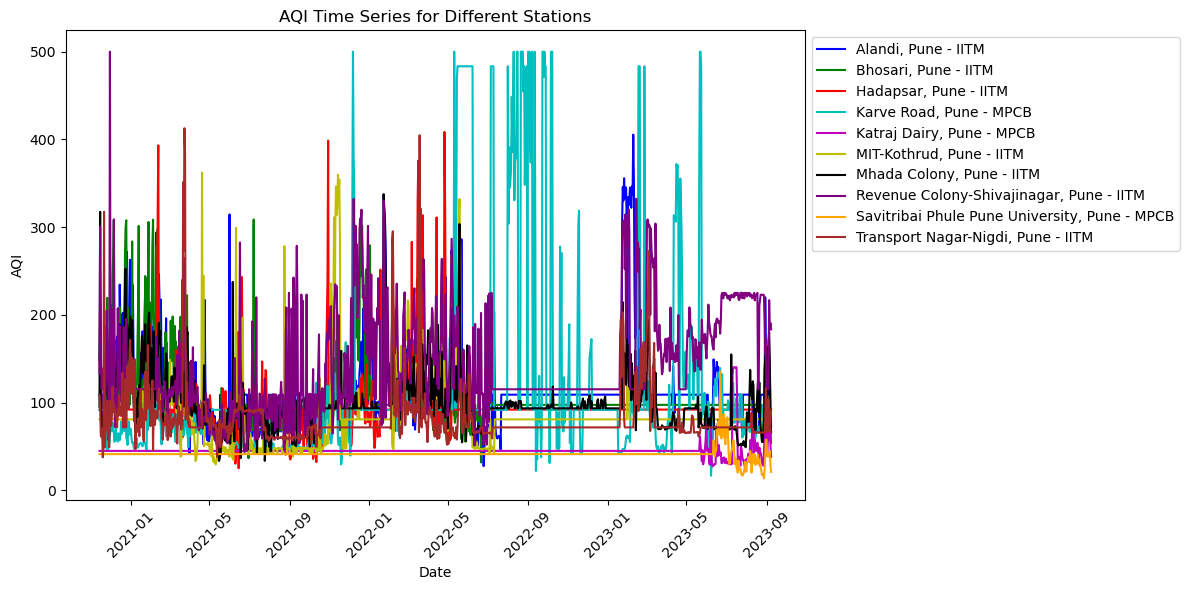

In [26]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'brown']

fig, ax = plt.subplots(figsize=(12, 6))

for i, station in enumerate(AQI_data.columns):  # Assuming first 10 columns are regions
    ax.plot(AQI_data.index, AQI_data[station], color=colors[i], label=station)

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
ax.set_title('AQI Time Series for Different Stations')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

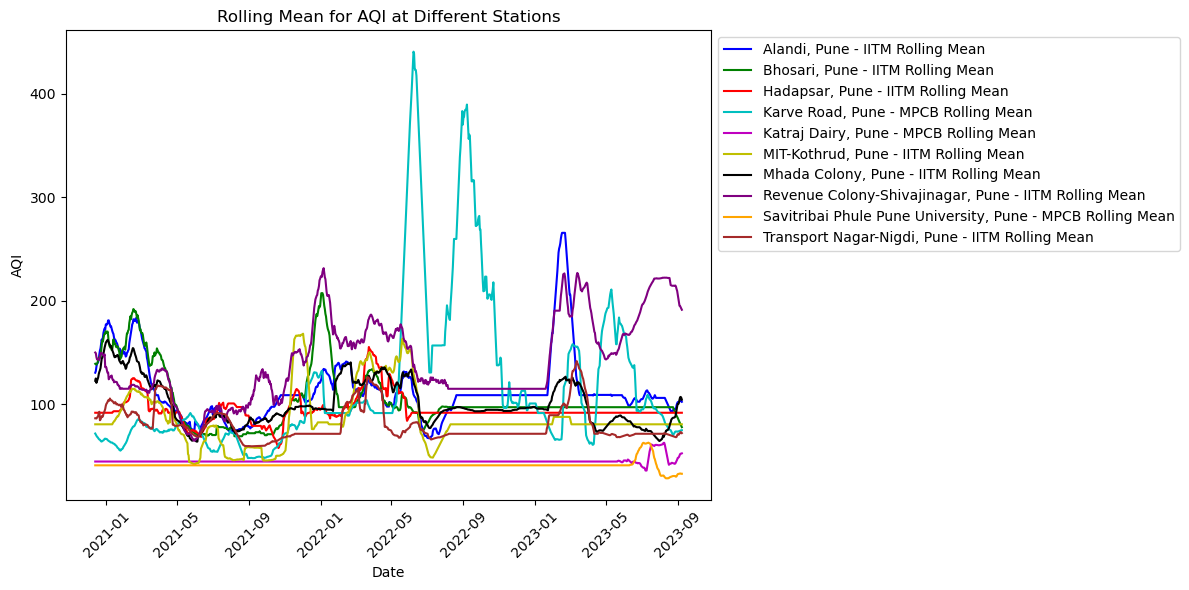

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot rolling statistics for AQI for each station with a different color
for i, station in enumerate(AQI_data.columns[:]):  # Assuming first 10 columns are stations
    rolling_mean = AQI_data[station].rolling(window=30).mean()
    ax.plot(AQI_data.index, rolling_mean, color=colors[i], label=f'{station} Rolling Mean')
    
# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
ax.set_title('Rolling Mean for AQI at Different Stations')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

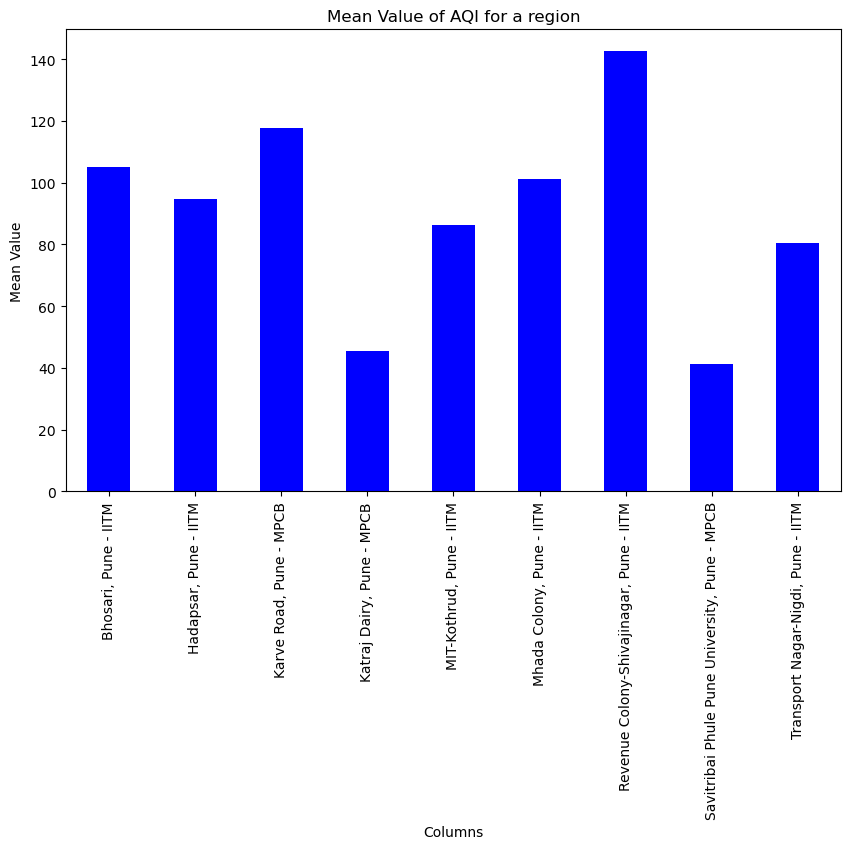

In [28]:
mean_values = AQI_data.iloc[:, 1:].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
mean_values.plot(kind='bar', color='blue')
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.title('Mean Value of AQI for a region')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [29]:
top_three_stations = mean_values.sort_values(ascending=False).head(3)
top_three_stations

Revenue Colony-Shivajinagar, Pune - IITM    142.544995
Karve Road, Pune - MPCB                     117.654879
Bhosari, Pune - IITM                        104.929825
dtype: float64

## Let's Analyse AQI of Karve Road

### Converting the Data

In [30]:
selected_columns = [
    ('From Date', 'From Date'),
    ('Karve Road, Pune - MPCB', 'PM2.5(ug/m3)'),
    ('Karve Road, Pune - MPCB', 'PM10(ug/m3)'),
    ('Karve Road, Pune - MPCB', 'NO2(ug/m3)'),
    ('Karve Road, Pune - MPCB', 'SO2(ug/m3)'),
    ('Karve Road, Pune - MPCB', 'CO(mg/m3)'),
    ('Karve Road, Pune - MPCB', 'Ozone(ug/m3)'),
]

data = complete_data[selected_columns].copy()

data.columns = ['Date', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']

data.head()

,Date,PM2.5,PM10,NO2,SO2,CO,Ozone
0,04-Aug-2015 - 00:00,36.29,103.19,39.91,24.94,0.85,13.41
1,05-Aug-2015 - 00:00,29.65,78.11,41.54,25.96,0.95,12.45
2,06-Aug-2015 - 00:00,34.86,92.90,40.66,25.41,0.92,12.25
3,07-Aug-2015 - 00:00,32.38,82.45,39.84,24.90,0.89,12.25
4,08-Aug-2015 - 00:00,26.87,80.69,42.51,26.57,0.79,12.07


In [31]:
data['Date'] = pd.to_datetime(data['Date'])

data['PM2.5'] = data['PM2.5'].apply(PM25)
data['PM10'] = data['PM10'].apply(PM10)
data['NO2'] = data['NO2'].apply(NO2)
data['SO2'] = data['SO2'].apply(SO2)
data['CO'] = data['CO'].apply(CO)
data['O3'] = data['Ozone'].apply(O3)

data.head()

,Date,PM2.5,PM10,NO2,SO2,CO,Ozone,O3
0,2015-08-04,60.48,102.13,49.89,31.18,42.5,13.41,13.41
1,2015-08-05,49.42,78.11,51.92,32.45,47.5,12.45,12.45
2,2015-08-06,58.10,92.90,50.82,31.76,46.0,12.25,12.25
3,2015-08-07,53.97,82.45,49.80,31.12,44.5,12.25,12.25
4,2015-08-08,44.78,80.69,53.14,33.21,39.5,12.07,12.07


### Getting to know the dataset

In [32]:
data.dtypes

Date     datetime64[ns]
PM2.5           float64
PM10            float64
NO2             float64
SO2             float64
CO              float64
Ozone           float64
O3              float64
dtype: object

In [33]:
data.describe()

,PM2.5,PM10,NO2,SO2,CO,Ozone,O3
count,2311.000000,2326.000000,2323.000000,2313.000000,2573.000000,2300.000000,2300.000000
mean,96.117369,79.654961,43.976853,34.076312,58.344030,22.611426,22.670378
std,89.740312,52.201851,80.477163,25.130096,28.675287,17.220132,17.737490
min,0.850000,1.210000,0.200000,0.350000,0.000000,0.230000,0.230000
25%,37.115000,39.525000,12.065000,15.510000,42.500000,11.390000,11.390000
50%,65.100000,73.255000,22.950000,29.060000,54.500000,15.830000,15.830000
75%,119.380000,108.947500,44.270000,41.140000,76.500000,31.460000,31.460000
max,500.000000,500.000000,483.330000,134.130000,157.880000,182.270000,235.680000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2960 entries, 0 to 2959
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2959 non-null   datetime64[ns]
 1   PM2.5   2311 non-null   float64       
 2   PM10    2326 non-null   float64       
 3   NO2     2323 non-null   float64       
 4   SO2     2313 non-null   float64       
 5   CO      2573 non-null   float64       
 6   Ozone   2300 non-null   float64       
 7   O3      2300 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 185.1 KB


In [35]:
data.shape

(2960, 8)

In [36]:
data['Date'].min()

Timestamp('2015-08-04 00:00:00')

In [37]:
data['Date'].max()

Timestamp('2023-09-08 00:00:00')

In [38]:
data.isnull().sum()

Date       1
PM2.5    649
PM10     634
NO2      637
SO2      647
CO       387
Ozone    660
O3       660
dtype: int64

In [39]:
seasonal_factors = data.groupby(data['Date'].dt.strftime('%m-%d')).transform('mean')
seasonal_factors

,PM2.5,PM10,NO2,SO2,CO,Ozone,O3
0,69.446667,54.176667,53.293333,29.592222,50.277778,25.938889,25.938889
1,67.955556,48.173333,55.730000,30.664444,51.694444,28.358889,28.704444
2,74.566667,63.293333,50.195556,31.186667,51.694444,20.333333,20.333333
3,85.666667,59.042222,62.756667,30.834444,51.513333,21.034444,21.034444
4,82.411111,64.650000,54.132222,30.471111,50.653333,20.957778,20.957778
...,...,...,...,...,...,...,...
2955,73.762222,60.422222,80.468750,34.743333,50.333333,20.827778,20.827778
2956,83.943333,69.295556,73.272500,34.620000,49.500000,16.341111,16.341111
2957,38.131250,50.408750,89.538750,32.795000,48.666667,15.033750,15.033750
2958,94.496667,60.323750,83.722500,45.238889,49.833333,16.596250,16.596250


In [40]:
data

,Date,PM2.5,PM10,NO2,SO2,CO,Ozone,O3
0,2015-08-04,60.48,102.13,49.89,31.18,42.5,13.41,13.41
1,2015-08-05,49.42,78.11,51.92,32.45,47.5,12.45,12.45
2,2015-08-06,58.10,92.90,50.82,31.76,46.0,12.25,12.25
3,2015-08-07,53.97,82.45,49.80,31.12,44.5,12.25,12.25
4,2015-08-08,44.78,80.69,53.14,33.21,39.5,12.07,12.07
...,...,...,...,...,...,...,...,...
2955,2023-09-04,41.98,75.57,NaN,11.79,20.0,41.57,41.57
2956,2023-09-05,35.25,63.46,NaN,9.90,16.5,29.46,29.46
2957,2023-09-06,39.02,70.21,NaN,10.95,18.5,36.21,36.21
2958,2023-09-07,41.60,74.89,NaN,11.69,20.0,40.89,40.89


In [41]:
for column in data.columns:
    if column != 'Date':
        data[column] = round(data[column].combine_first(seasonal_factors[column]), 2)
data

,Date,PM2.5,PM10,NO2,SO2,CO,Ozone,O3
0,2015-08-04,60.48,102.13,49.89,31.18,42.5,13.41,13.41
1,2015-08-05,49.42,78.11,51.92,32.45,47.5,12.45,12.45
2,2015-08-06,58.10,92.90,50.82,31.76,46.0,12.25,12.25
3,2015-08-07,53.97,82.45,49.80,31.12,44.5,12.25,12.25
4,2015-08-08,44.78,80.69,53.14,33.21,39.5,12.07,12.07
...,...,...,...,...,...,...,...,...
2955,2023-09-04,41.98,75.57,80.47,11.79,20.0,41.57,41.57
2956,2023-09-05,35.25,63.46,73.27,9.90,16.5,29.46,29.46
2957,2023-09-06,39.02,70.21,89.54,10.95,18.5,36.21,36.21
2958,2023-09-07,41.60,74.89,83.72,11.69,20.0,40.89,40.89


In [42]:
data = data.dropna()
data.isnull().sum()

Date     0
PM2.5    0
PM10     0
NO2      0
SO2      0
CO       0
Ozone    0
O3       0
dtype: int64

### Finding AQI

In [43]:
data['AQI'] = data.max(axis=1)
data.head()

,Date,PM2.5,PM10,NO2,SO2,CO,Ozone,O3,AQI
0,2015-08-04,60.48,102.13,49.89,31.18,42.5,13.41,13.41,102.13
1,2015-08-05,49.42,78.11,51.92,32.45,47.5,12.45,12.45,78.11
2,2015-08-06,58.10,92.90,50.82,31.76,46.0,12.25,12.25,92.90
3,2015-08-07,53.97,82.45,49.80,31.12,44.5,12.25,12.25,82.45
4,2015-08-08,44.78,80.69,53.14,33.21,39.5,12.07,12.07,80.69


### Setting the indices of dataset into dates

In [44]:
data.set_index('Date', inplace=True)
data.head()

,PM2.5,PM10,NO2,SO2,CO,Ozone,O3,AQI
Date,,,,,,,,
2015-08-04,60.48,102.13,49.89,31.18,42.5,13.41,13.41,102.13
2015-08-05,49.42,78.11,51.92,32.45,47.5,12.45,12.45,78.11
2015-08-06,58.10,92.90,50.82,31.76,46.0,12.25,12.25,92.90
2015-08-07,53.97,82.45,49.80,31.12,44.5,12.25,12.25,82.45
2015-08-08,44.78,80.69,53.14,33.21,39.5,12.07,12.07,80.69


### Finding the top 3 pollutants

<Axes: >

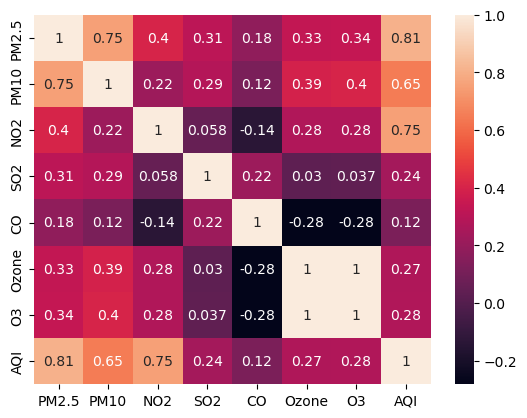

In [45]:
# correlation heatmap
sns.heatmap(data.corr(method='pearson'), annot=True)

In [46]:
correlation_matrix = data.corr()
top_pollutants = correlation_matrix['AQI'].abs().nlargest(4).index[1:]
print('The top 3 pollutants are:')
print(f'1. {top_pollutants[0]}')
print(f'2. {top_pollutants[1]}')
print(f'3. {top_pollutants[2]}')

The top 3 pollutants are:
1. PM2.5
2. NO2
3. PM10


### Defining some common functions

In [47]:
width = 12
height = 4

def plot_acf_pacf(df, column, figsize=(width, 3*height), title=None):
    ts = df[column].dropna()
    
    fig = plt.figure(figsize=figsize)
    if title:
        fig.suptitle(title, fontsize=16, y=1)
    
    ax1 = fig.add_subplot(311)
    ax1.plot(ts)
    ax1.set_title('AQI Time Series')

    # Plot the autocorrelation function ACF
    ax2 = fig.add_subplot(312)
    fig = plot_acf(ts, lags=40, ax=ax2)
    ax2.set_title('Autocorrelation Function (ACF)')

    # Plot the partial autocorrelation function
    ax3 = fig.add_subplot(313)
    fig = plot_pacf(ts, lags=40, method = 'ywm', ax=ax3)
    ax3.set_title('Partial Autocorrelation Function (PACF)')
    
    plt.tight_layout()
    plt.show()

In [48]:
def check_stationarity(data, pollutant):
    print(f'p-value for ADF test: {adfuller(data[pollutant].dropna())[1]}')
    print(f'p-value for kpss test: {kpss(data[pollutant].dropna())[1]}')
    
    if adfuller(data[pollutant].dropna())[1] < 0.05 and kpss(data[pollutant].dropna())[1] >= 0.05:
        print(f'{pollutant} is stationary')
    else:
        print(f'{pollutant} is non-stationary')

In [49]:
def find_best_arima_parameters(ts, max_p, max_q):
    best_aic = float('inf')
    best_params = None

    for p, q in itertools.product(range(max_p + 1), range(max_q + 1)):
        if p == 0 and q == 0:
            continue

        try:
            model = ARIMA(ts, order=(p, 1, q))
            results = model.fit()
            aic = results.aic
            
            if aic < best_aic:
                best_aic = aic
                best_params = (p, 1, q)

        except:
            continue

    return best_params, best_aic

In [50]:
import warnings
def rolling_forecast(pollutant, diff_pollutant, order):
    warnings.filterwarnings('ignore')
    reverse_diff = train[pollutant][-1]
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[diff_pollutant][t]
        history.append(obs)
        frcst = predictions[t] + reverse_diff
        forecast.append(frcst)
        reverse_diff = test[pollutant][t]   

In [51]:
def compare_forecast(test, pollutant, forecast):
    plt.figure(figsize=(12, 6))
    
    plt.plot(test.index, test[pollutant], label=f'Test {pollutant} Data', color='blue')
    plt.plot(test.index, forecast, label=f'Forecast {pollutant} Data', color='red')

    plt.ylabel(f'{pollutant} value')
    plt.title(f'Test {pollutant} Data vs Forecast {pollutant} Data')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [52]:
def metrics(test, pollutant, forecast):
    mae = mean_absolute_error(test[pollutant], forecast)

    mse = mean_squared_error(test[pollutant], forecast)

    y_test, y_pred = np.array(test[pollutant]), np.array(forecast)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"MAPE: {mape}%")

### PM2.5

In [53]:
pollutant = 'PM2.5'
diff_pollutant = 'PM2.5_diff'

#### Checking stationarity

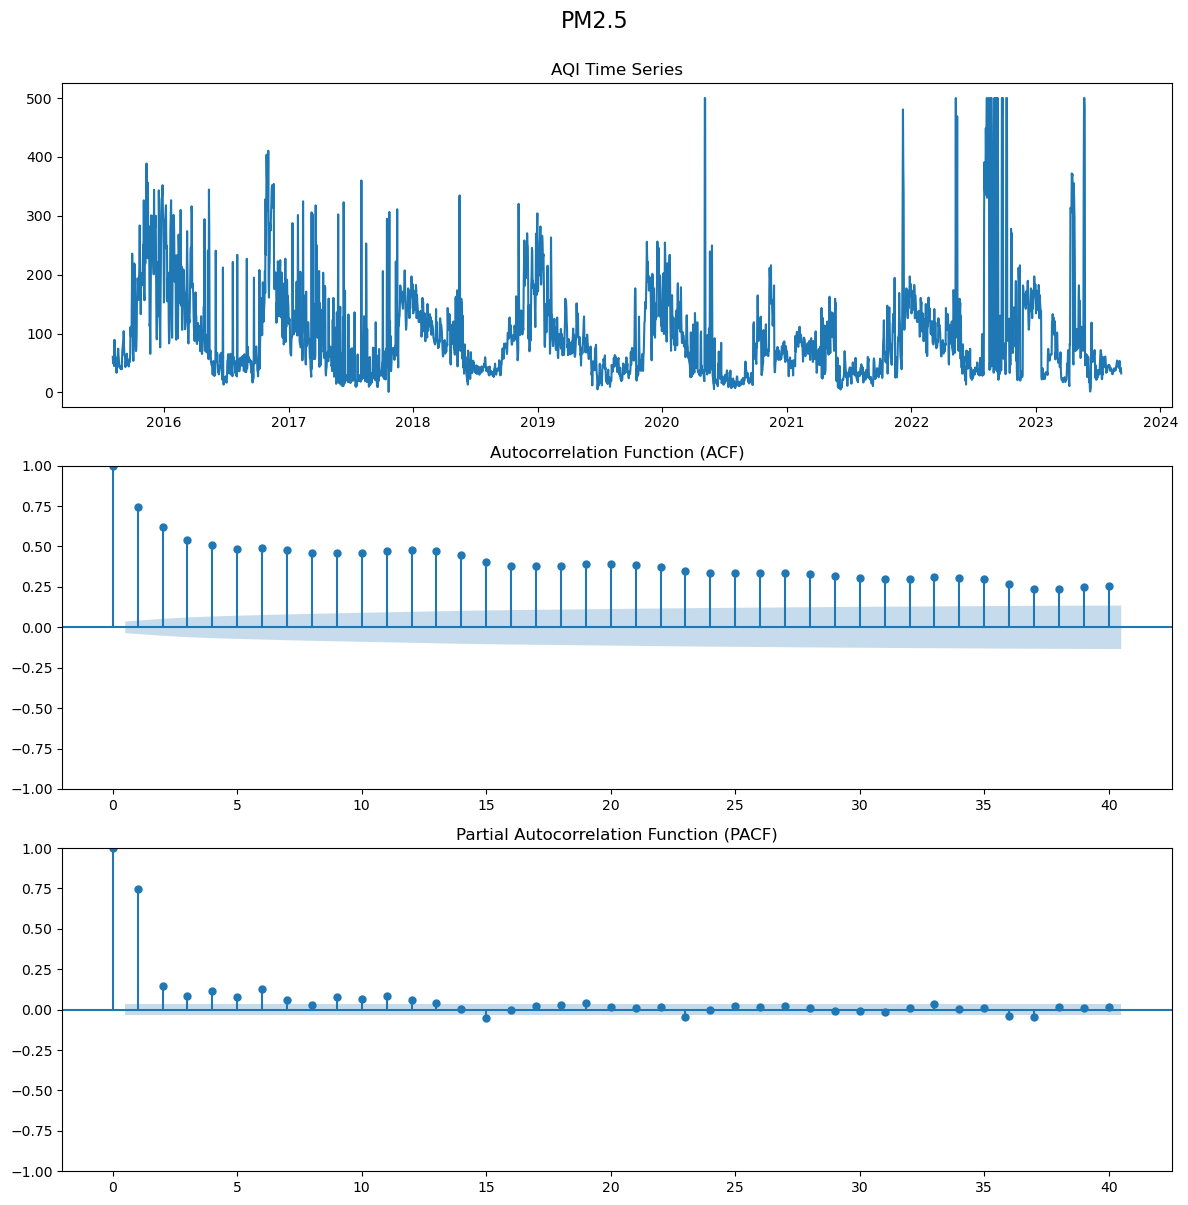

In [54]:
# 1. visualization
plot_acf_pacf(data, pollutant, title=pollutant)

In [55]:
check_stationarity(data, pollutant)

p-value for ADF test: 3.520387540699212e-06
p-value for kpss test: 0.04357172987321912
PM2.5 is non-stationary


#### Making a data stationary

In [56]:
data[diff_pollutant] = data[pollutant].diff()

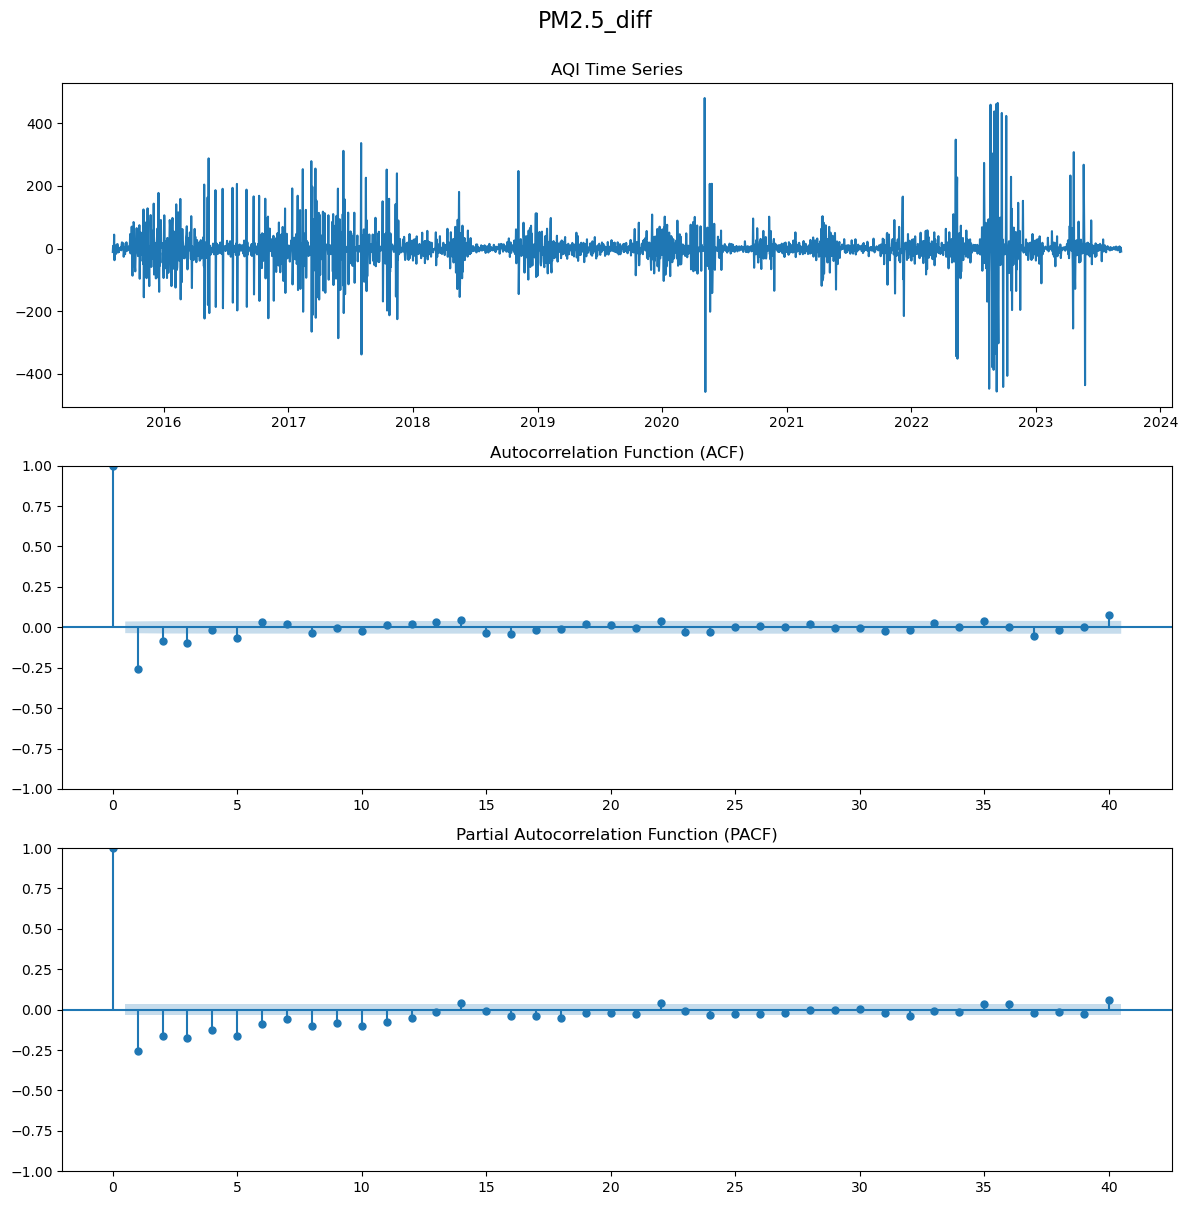

In [57]:
plot_acf_pacf(data, diff_pollutant, title=diff_pollutant)

In [58]:
import warnings
warnings.filterwarnings('ignore')
check_stationarity(data, diff_pollutant)

p-value for ADF test: 2.4678066442327222e-28
p-value for kpss test: 0.1
PM2.5_diff is stationary


#### Splitting the dataset

In [59]:
train = data.dropna()[:-365]
test = data.dropna()[-365:]
print('Length of training dataset: ', len(train))
print('Length of testing dataset: ', len(test))

Length of training dataset:  2593
Length of testing dataset:  365


#### Finding the best parameters

In [62]:
ts = train[diff_pollutant]

best_params, best_aic = find_best_arima_parameters(ts, max_p=10, max_q=10)
print("Best AIC:", best_aic)
print("Best ARIMA Model (p, d, q):", best_params)

Best AIC: 27612.141912051997
Best ARIMA Model (p, d, q): (3, 1, 8)


#### Forecasting

In [63]:
history = [x for x in train['PM2.5_diff'].dropna()]
predictions = list()
forecast = []

rolling_forecast(pollutant, diff_pollutant, best_params)

In [64]:
all_forecast = pd.DataFrame(columns=top_pollutants, index=test.index)
all_forecast[pollutant] = forecast

#### Comparing the forecast with actual values

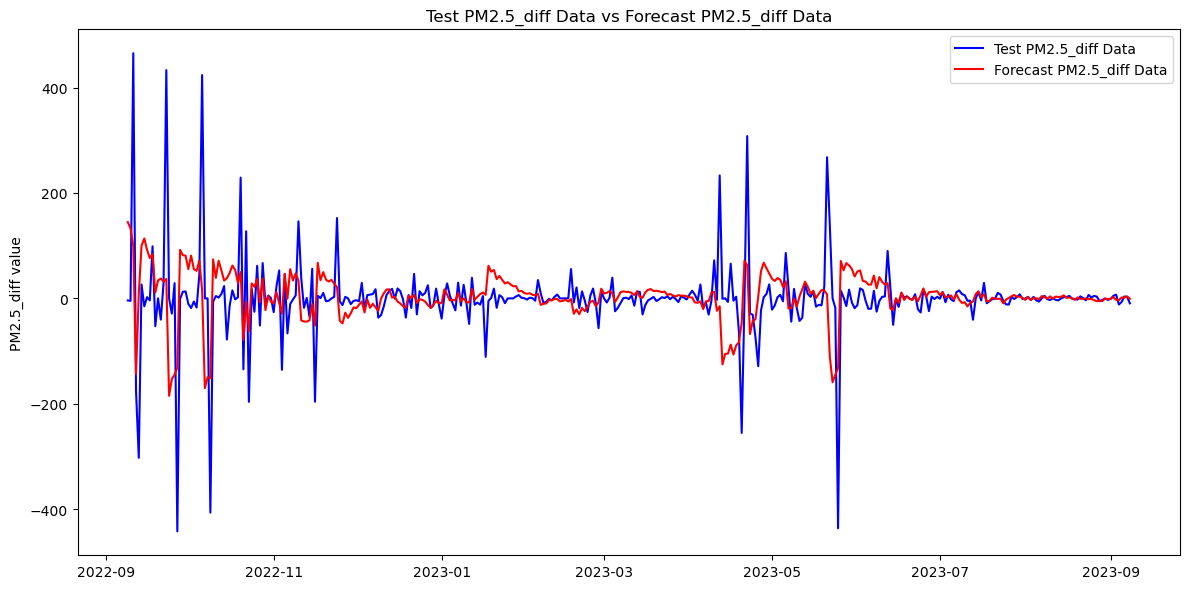

In [65]:
compare_forecast(test, diff_pollutant, predictions)

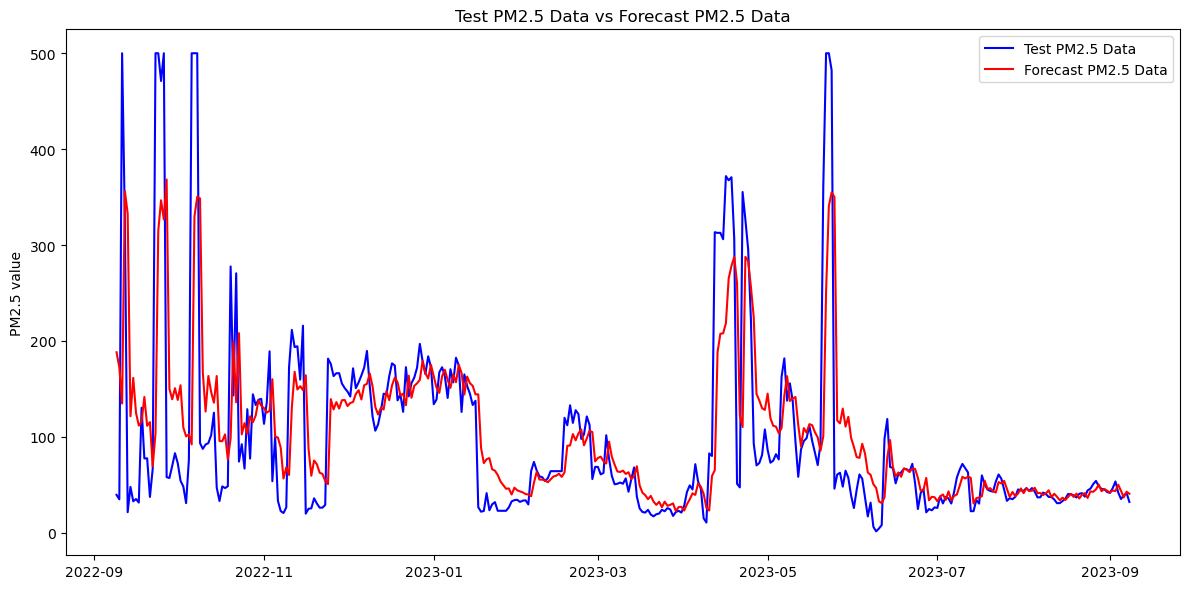

In [66]:
compare_forecast(test, pollutant, forecast)

#### Evaluation

In [67]:
metrics(test, pollutant, forecast)

MAE: 39.129173155644814
MSE: 5198.448473786451
MAPE: 71.43975550442482%


### PM10

In [68]:
pollutant = 'PM10'
diff_pollutant = 'PM10_diff'

#### Checking stationarity

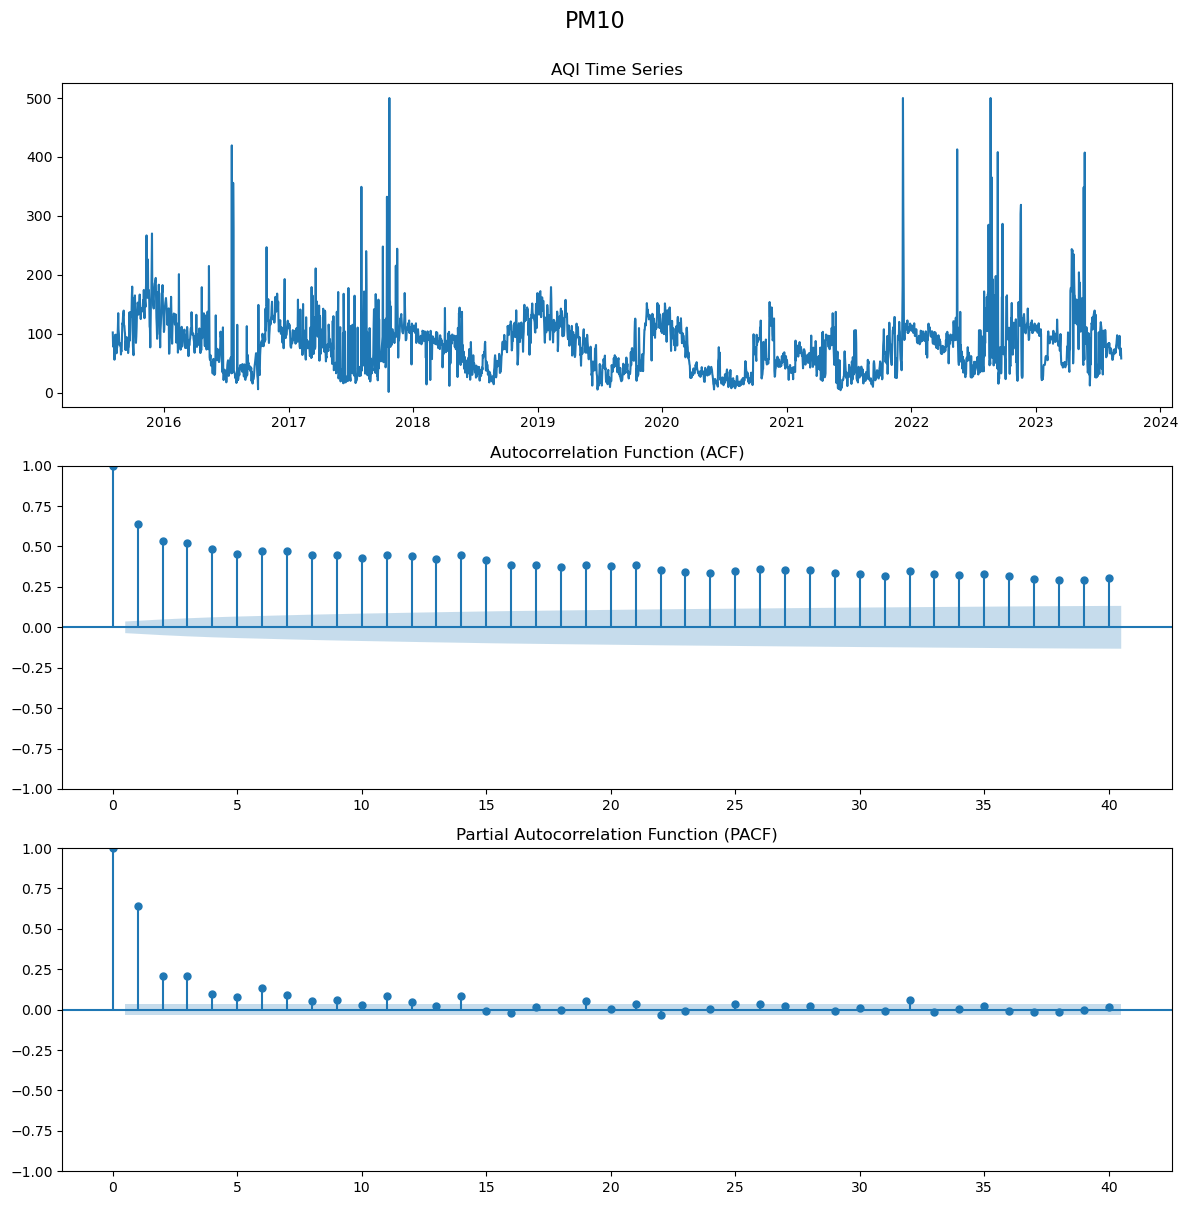

In [69]:
# 1. visualization
plot_acf_pacf(data, pollutant, title=pollutant)

In [70]:
check_stationarity(data, pollutant)

p-value for ADF test: 1.4380884198866357e-05
p-value for kpss test: 0.012817520060527963
PM10 is non-stationary


#### Making a data stationary

In [71]:
data[diff_pollutant] = data[pollutant].diff()

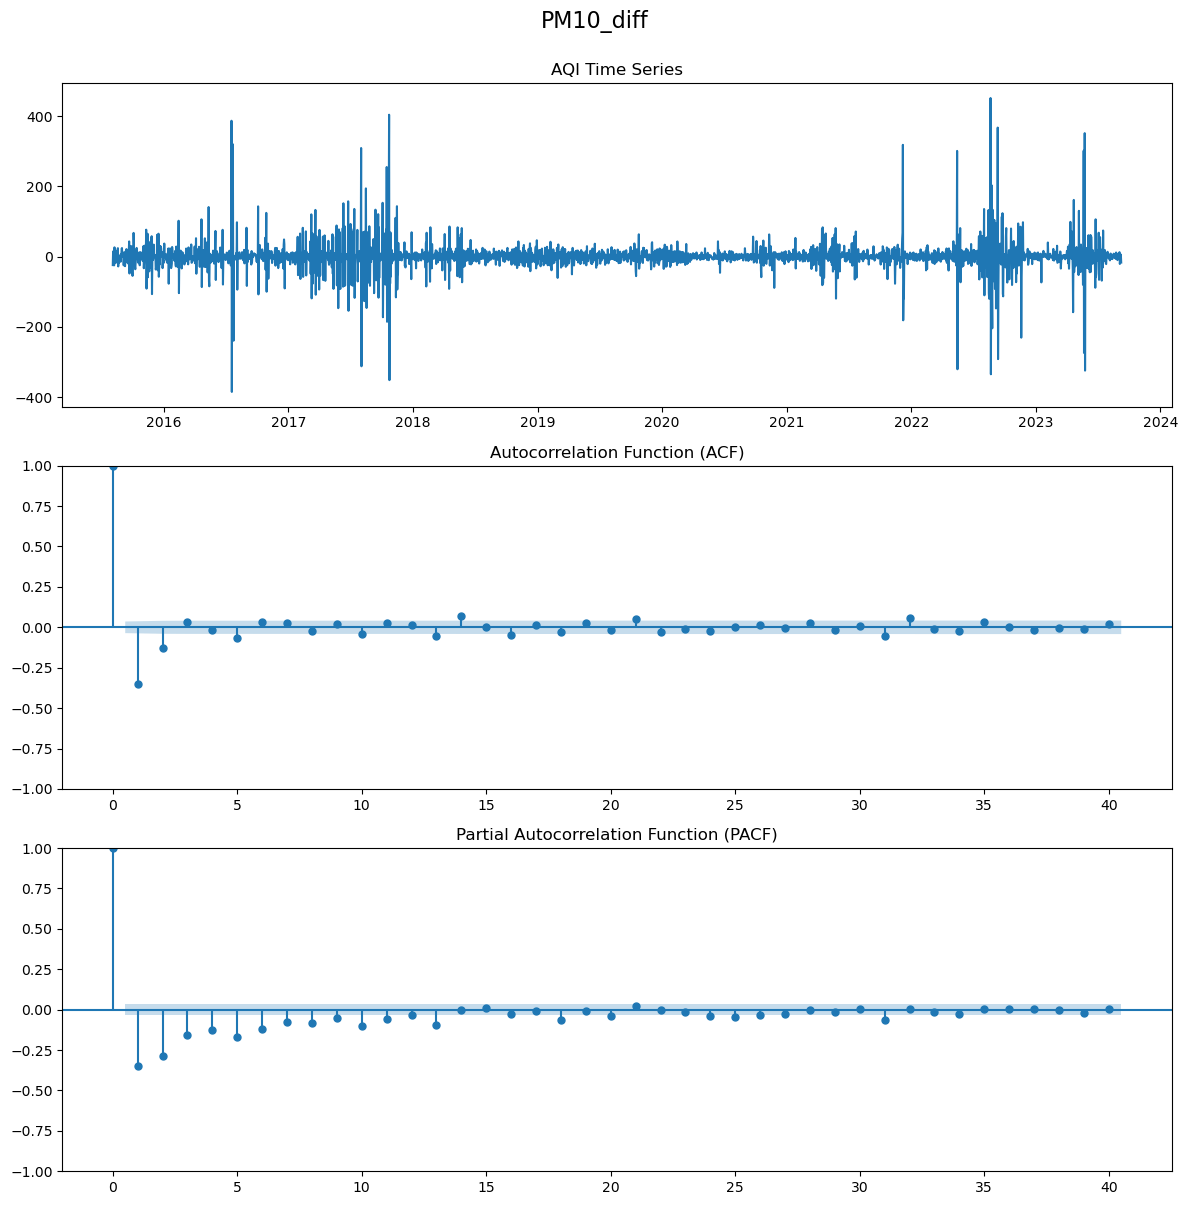

In [72]:
plot_acf_pacf(data, diff_pollutant, title=diff_pollutant)

In [73]:
import warnings
warnings.filterwarnings('ignore')
check_stationarity(data, diff_pollutant)

p-value for ADF test: 9.630793377419459e-28
p-value for kpss test: 0.1
PM10_diff is stationary


#### Splitting the dataset

In [74]:
train = data.dropna()[:-365]
test = data.dropna()[-365:]
print('Length of training dataset: ', len(train))
print('Length of testing dataset: ', len(test))

Length of training dataset:  2593
Length of testing dataset:  365


#### Finding the best parameters

In [75]:
ts = train[diff_pollutant]

best_params, best_aic = find_best_arima_parameters(ts, max_p=10, max_q=10)
print("Best AIC:", best_aic)
print("Best ARIMA Model (p, d, q):", best_params)

Best AIC: 25349.81854832865
Best ARIMA Model (p, d, q): (2, 1, 8)


#### Forecasting

In [76]:
history = [x for x in train['PM10_diff'].dropna()]
predictions = list()
forecast = []

rolling_forecast(pollutant, diff_pollutant, best_params)

In [77]:
all_forecast[pollutant] = forecast

#### Comparing the forecast with actual values

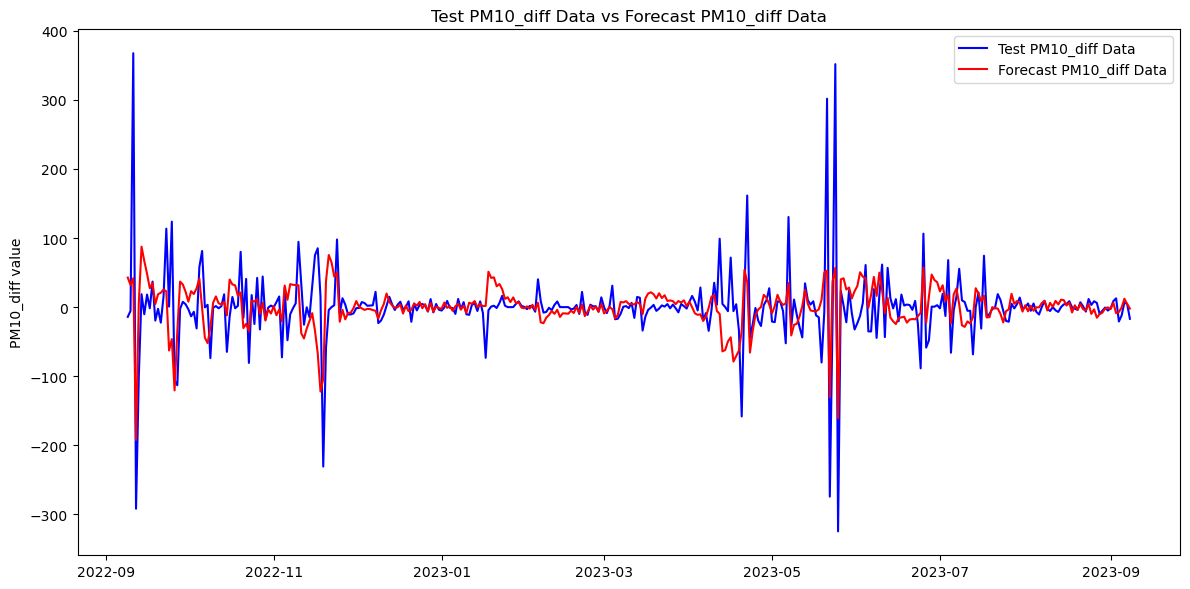

In [78]:
compare_forecast(test, diff_pollutant, predictions)

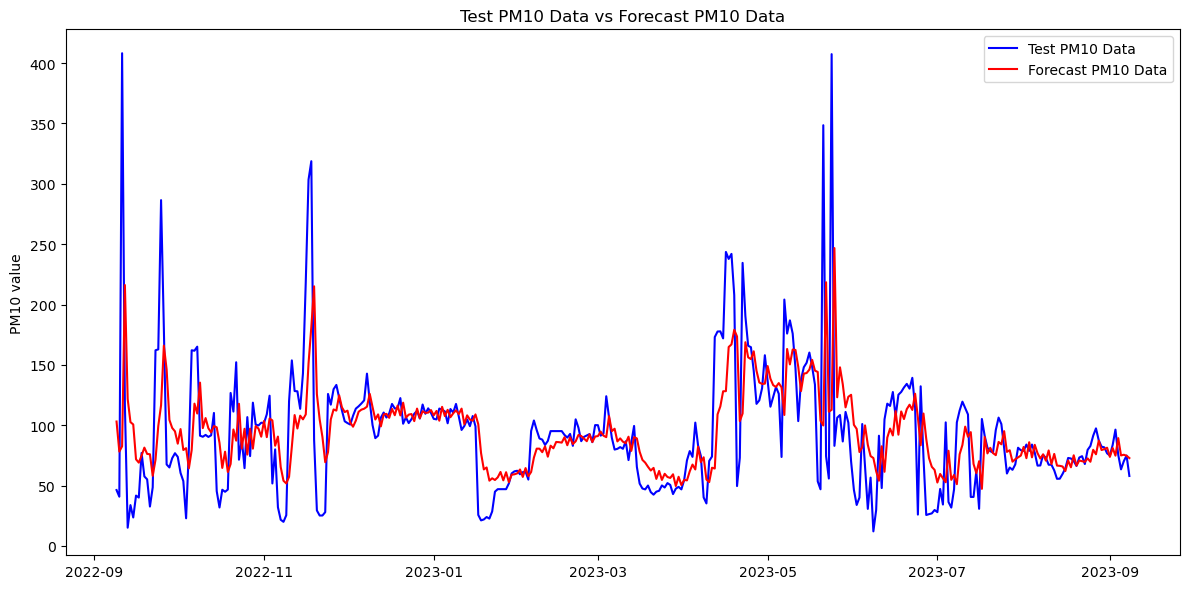

In [79]:
compare_forecast(test, pollutant, forecast)

#### Evaluation

In [80]:
metrics(test, pollutant, forecast)

MAE: 26.77130566377106
MSE: 2135.479691049192
MAPE: 41.686026671221555%


### NO2

In [81]:
pollutant = 'NO2'
diff_pollutant = 'NO2_diff'

#### Checking stationarity

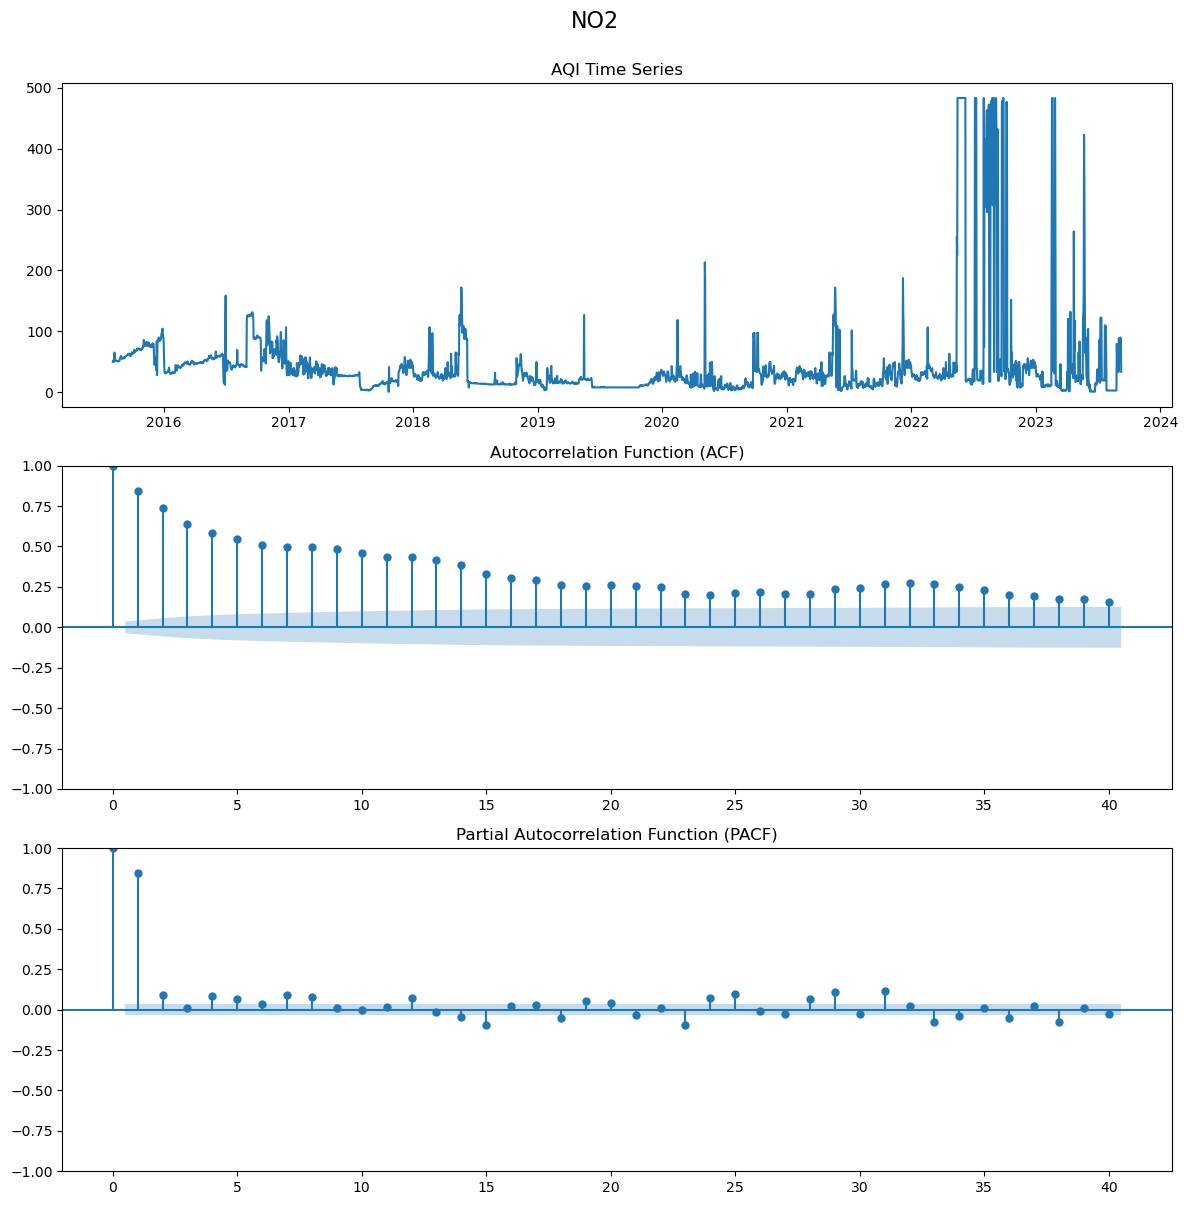

In [82]:
# 1. visualization
plot_acf_pacf(data, pollutant, title=pollutant)

In [83]:
check_stationarity(data, pollutant)

p-value for ADF test: 1.892733551247327e-06
p-value for kpss test: 0.01498162779918677
NO2 is non-stationary


#### Making a data stationary

In [84]:
data[diff_pollutant] = data[pollutant].diff()

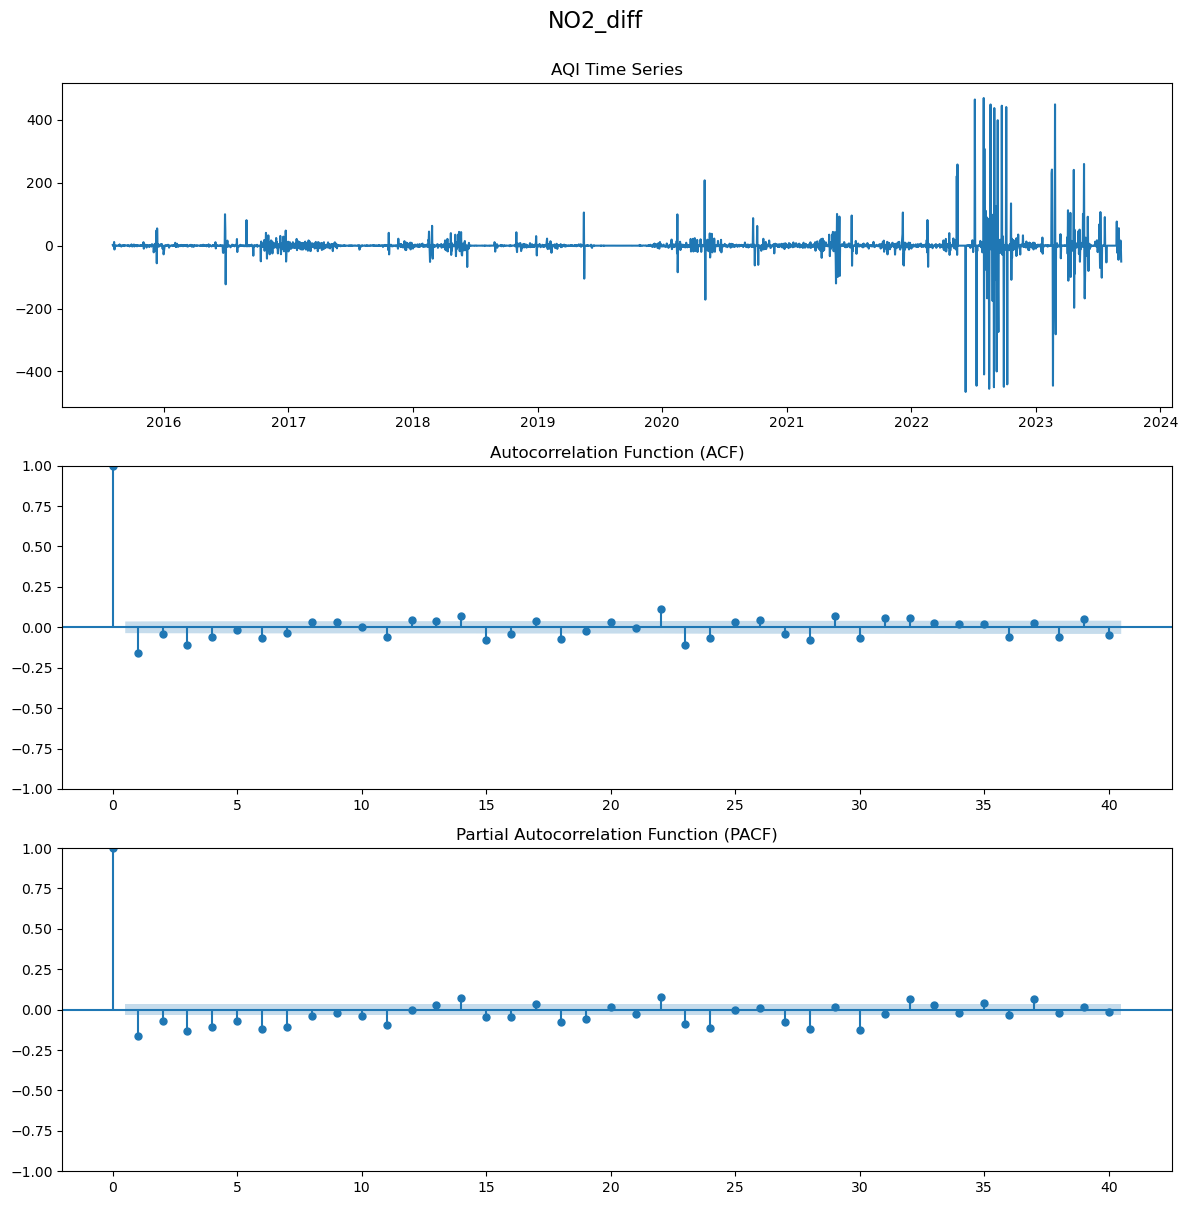

In [85]:
plot_acf_pacf(data, diff_pollutant, title=diff_pollutant)

In [86]:
import warnings
warnings.filterwarnings('ignore')
check_stationarity(data, diff_pollutant)

p-value for ADF test: 2.8788630121916956e-29
p-value for kpss test: 0.1
NO2_diff is stationary


#### Splitting the dataset

In [87]:
train = data.dropna()[:-365]
test = data.dropna()[-365:]
print('Length of training dataset: ', len(train))
print('Length of testing dataset: ', len(test))

Length of training dataset:  2593
Length of testing dataset:  365


#### Finding the best parameters

In [88]:
ts = train[diff_pollutant]

best_params, best_aic = find_best_arima_parameters(ts, max_p=5, max_q=5)
print("Best AIC:", best_aic)
print("Best ARIMA Model (p, d, q):", best_params)

Best AIC: 25155.91683723054
Best ARIMA Model (p, d, q): (3, 1, 3)


#### Forecasting

In [89]:
history = [x for x in train['PM10_diff'].dropna()]
predictions = list()
forecast = []

rolling_forecast(pollutant, diff_pollutant, best_params)

In [90]:
all_forecast[pollutant] = forecast

#### Comparing the forecast with actual values

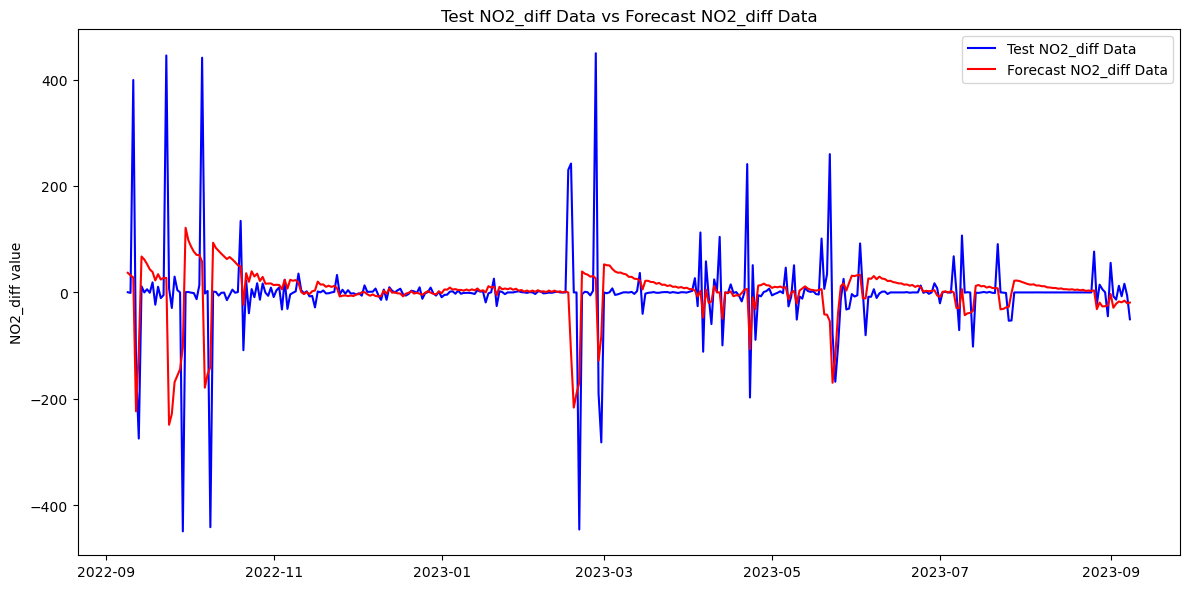

In [91]:
compare_forecast(test, diff_pollutant, predictions)

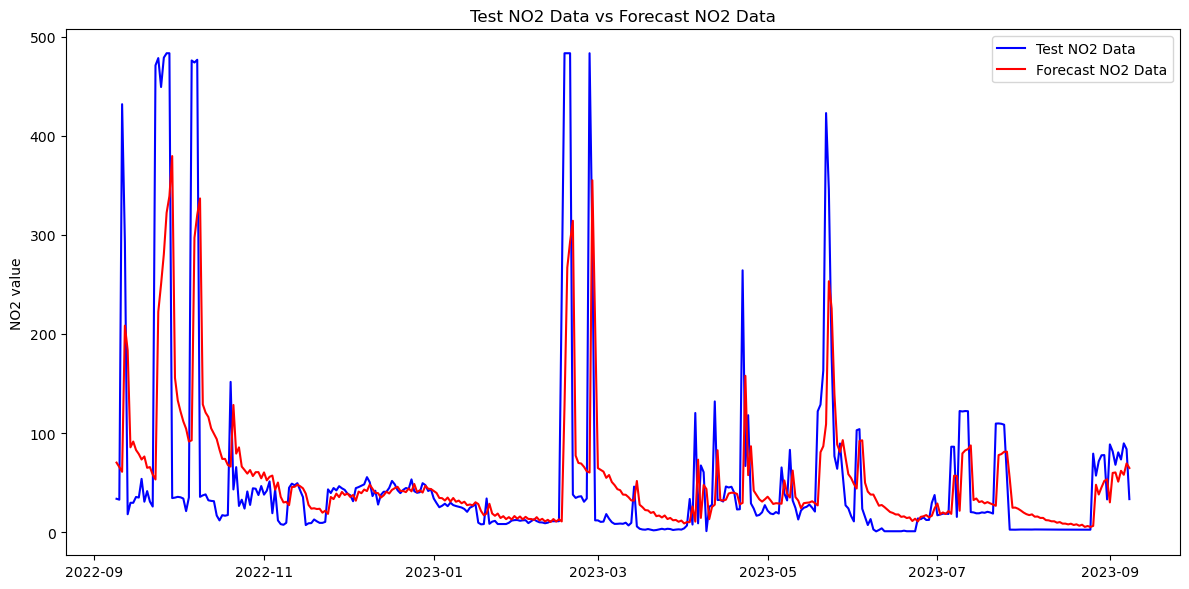

In [92]:
compare_forecast(test, pollutant, forecast)

#### Evaluation


In [93]:
metrics(test, pollutant, forecast)

MAE: 37.060910666311166
MSE: 5563.557202616981
MAPE: 251.96776086183678%


## AQI forecast for Karve Road Station

In [94]:
AQI_forecast = all_forecast.max(axis=1)

#### Comparing the forecast with actual values

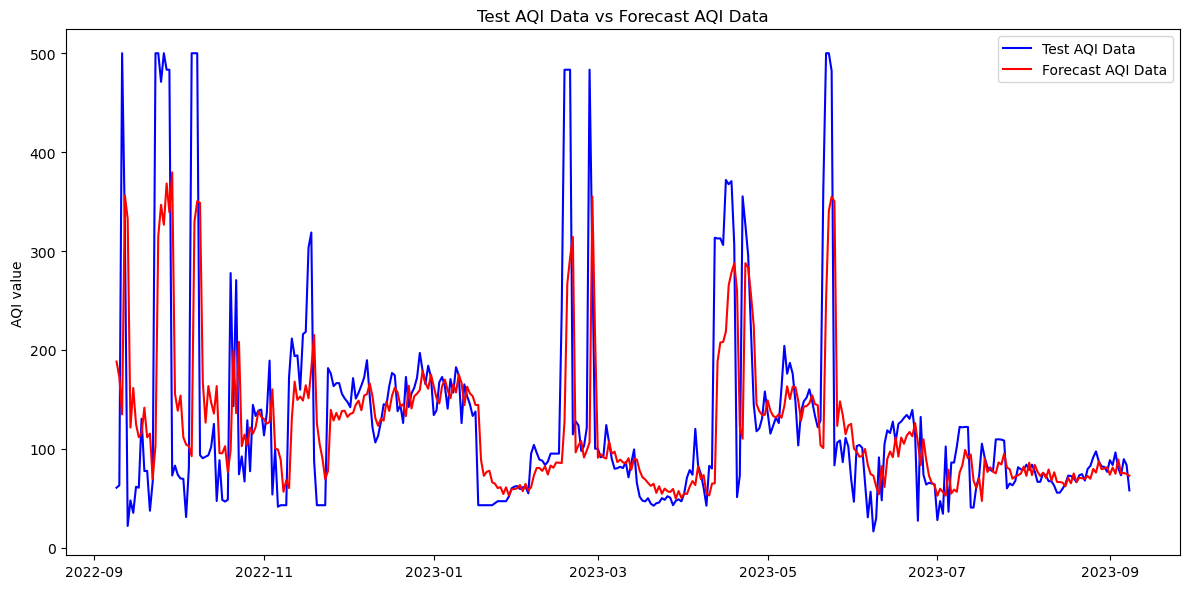

In [95]:
compare_forecast(test, 'AQI', AQI_forecast)

#### Evaluation

In [96]:
metrics(test, 'AQI', AQI_forecast)

MAE: 43.14287899647591
MSE: 6257.65271488422
MAPE: 42.66902576803216%


## Generating a report for a given date

In [97]:
all_forecast['AQI'] = AQI_forecast
all_forecast

,PM2.5,NO2,PM10,AQI
Date,,,,
2022-09-09,188.267798,70.125168,103.104581,188.267798
2022-09-10,172.450909,65.640359,78.210705,172.450909
2022-09-11,134.806452,60.846760,82.611912,134.806452
2022-09-12,356.193587,208.356818,216.159010,356.193587
2022-09-13,332.756984,183.343252,121.749699,332.756984
...,...,...,...,...
2023-09-04,50.158821,50.897414,89.334767,89.334767
2023-09-05,43.751252,61.862801,75.012128,75.012128
2023-09-06,36.916665,57.837339,75.570453,75.570453


In [99]:
def generate_aqi_report(df, date):

    try:
        aqi_value = df.loc[date, 'AQI']
        pollutants = df.loc[date, ['PM2.5', 'NO2', 'PM10']]
    except KeyError:
        return f"No data available for {date}"

    aqi_categories = {
        (0, 50): {"status": "Good", "suggestion": "Air quality is considered satisfactory, and air pollution poses little or no risk.", "color": "Green"},
        (51, 100): {"status": "Satisfactory", "suggestion": "Air quality is acceptable; however, some pollutants may be a concern for a very small number of people who are unusually sensitive to air pollution.", "color": "Yellow"},
        (101, 200): {"status": "Moderate", "suggestion": "Members of sensitive groups may experience health effects, but the general public is less likely to be affected.", "color": "Orange"},
        (201, 300): {"status": "Poor", "suggestion": "Everyone may begin to experience health effects; members of sensitive groups may experience more serious health effects.", "color": "Red"},
        (301, 400): {"status": "Very Poor", "suggestion": "Health alert: everyone may experience more serious health effects.", "color": "Purple"},
        (401, 500): {"status": "Severe", "suggestion": "Health warnings of emergency conditions; the entire population is more likely to be affected.", "color": "Maroon"}
    }

    for category_range, category_info in aqi_categories.items():
        if category_range[0] <= aqi_value <= category_range[1]:
            aqi_status = category_info['status']
            aqi_suggestion = category_info['suggestion']
            aqi_color = category_info['color']
            break
    else:
        aqi_status = "Out of Range"
        aqi_suggestion = "AQI value is not within the defined ranges."
        aqi_color = "Undefined"

    report = f"Date: {date}\nAQI Value: {aqi_value} (Color Code: {aqi_color})\nStatus: {aqi_status}\nSuggestions: {aqi_suggestion}\n\nPollutant Values:\n{pollutants.to_string()}"

    return report

we can check for any date between, 2022-09-09 and 2023-09-08

In [110]:
# Example 1
date_to_check = "2023-03-29"
report_for_date = generate_aqi_report(all_forecast, date_to_check)
print(report_for_date)

Date: 2023-03-29
AQI Value: 49.66397279828277 (Color Code: Green)
Status: Good
Suggestions: Air quality is considered satisfactory, and air pollution poses little or no risk.

Pollutant Values:
PM2.5    22.773793
NO2      12.255180
PM10     49.663973


In [111]:
# Example 2
date_to_check = "2023-09-02"
report_for_date = generate_aqi_report(all_forecast, date_to_check)
print(report_for_date)

Date: 2023-09-02
AQI Value: 81.16996935143986 (Color Code: Yellow)
Status: Satisfactory
Suggestions: Air quality is acceptable; however, some pollutants may be a concern for a very small number of people who are unusually sensitive to air pollution.

Pollutant Values:
PM2.5    44.186603
NO2      59.713894
PM10     81.169969


In [103]:
# Example 3
date_to_check = "2022-10-02"
report_for_date = generate_aqi_report(all_forecast, date_to_check)
print(report_for_date)

Date: 2022-10-02
AQI Value: 153.84324721179803 (Color Code: Orange)
Status: Moderate
Suggestions: Members of sensitive groups may experience health effects, but the general public is less likely to be affected.

Pollutant Values:
PM2.5    153.843247
NO2      121.669806
PM10      96.829344


In [112]:
# Example 4
date_to_check = "2023-04-14"
report_for_date = generate_aqi_report(all_forecast, date_to_check)
print(report_for_date)

Date: 2023-04-14
AQI Value: 207.5368351832522 (Color Code: Red)
Status: Poor
Suggestions: Everyone may begin to experience health effects; members of sensitive groups may experience more serious health effects.

Pollutant Values:
PM2.5    207.536835
NO2       32.280913
PM10     115.615965


In [107]:
# Example 5
date_to_check = "2022-09-12"
report_for_date = generate_aqi_report(all_forecast, date_to_check)
print(report_for_date)

Date: 2022-09-12
AQI Value: 356.19358732894415 (Color Code: Purple)
Status: Very Poor
Suggestions: Health alert: everyone may experience more serious health effects.

Pollutant Values:
PM2.5    356.193587
NO2      208.356818
PM10     216.159010


In [113]:
max(all_forecast.AQI)

379.5260943543532